## EDA

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import set_style
import seaborn as sns
set_style("whitegrid")

from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("G:/My Drive/Erdos/Fall2022_Juniper/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

No missing data

In [4]:
data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


#### Checking correlation

<AxesSubplot:>

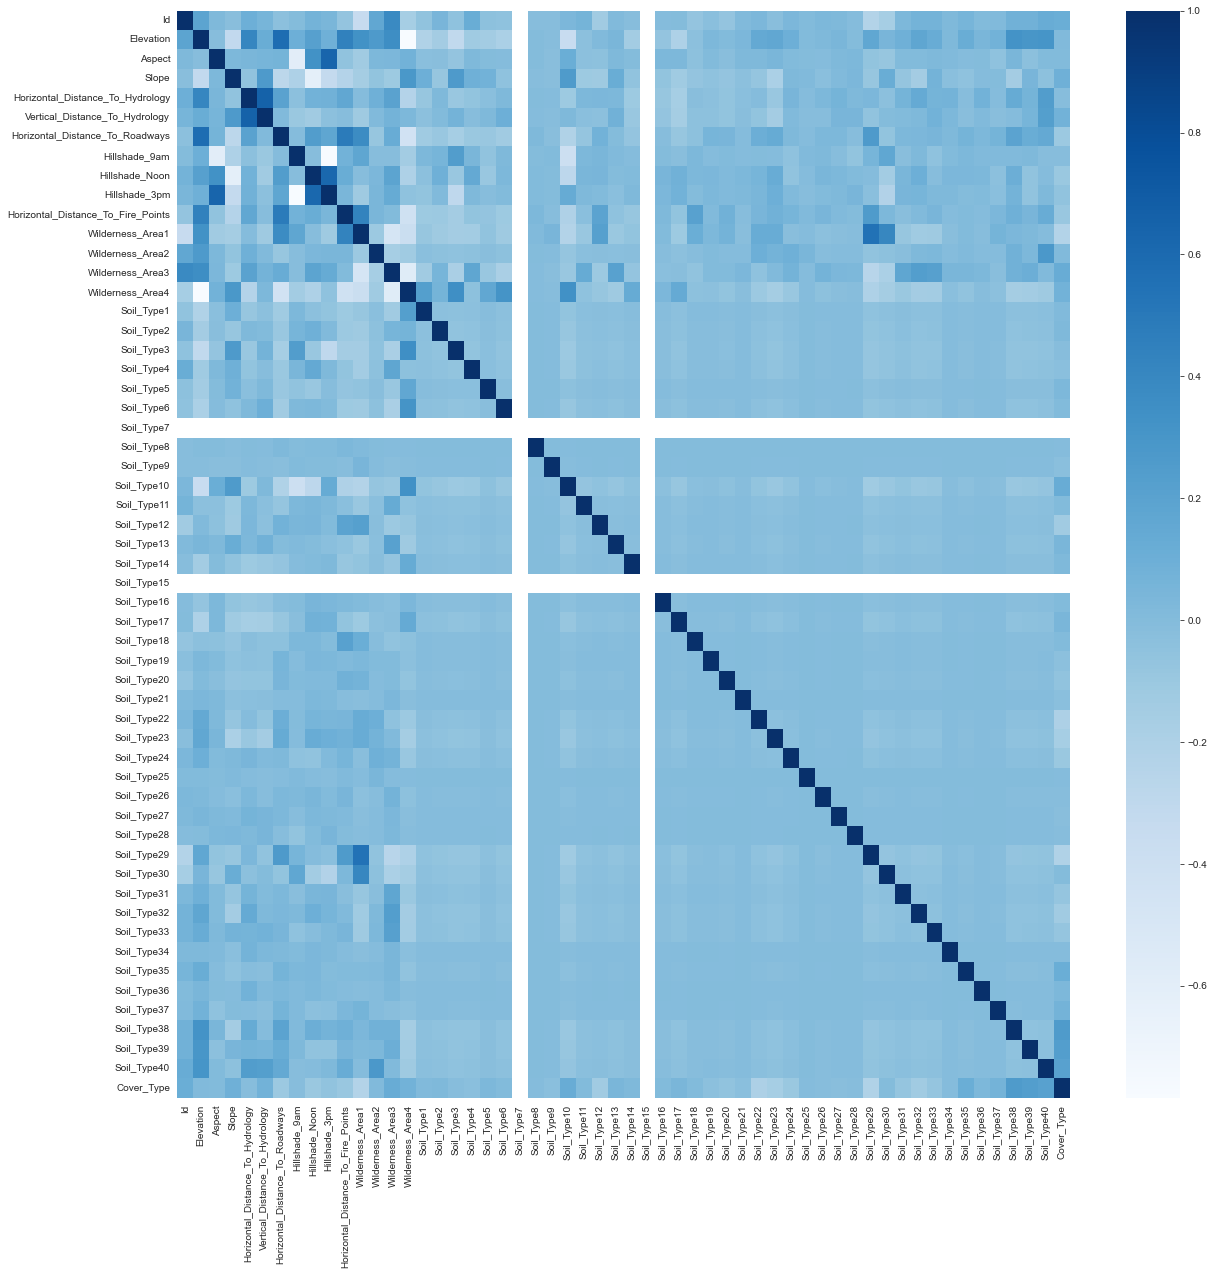

In [9]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap='Blues')

In [10]:
corr_high = corr.unstack()
corr_high = corr_high[abs(corr_high) >= 0.6]
corr_high = corr_high[abs(corr_high) < 1]
corr_high.sort_values(key=abs)

Slope                             Hillshade_Noon                     -0.612613
Hillshade_Noon                    Slope                              -0.612613
                                  Hillshade_3pm                       0.614526
Hillshade_3pm                     Hillshade_Noon                      0.614526
Aspect                            Hillshade_3pm                       0.635022
Hillshade_3pm                     Aspect                              0.635022
Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology      0.652142
Vertical_Distance_To_Hydrology    Horizontal_Distance_To_Hydrology    0.652142
Hillshade_9am                     Hillshade_3pm                      -0.779965
Hillshade_3pm                     Hillshade_9am                      -0.779965
Elevation                         Wilderness_Area4                   -0.783651
Wilderness_Area4                  Elevation                          -0.783651
dtype: float64

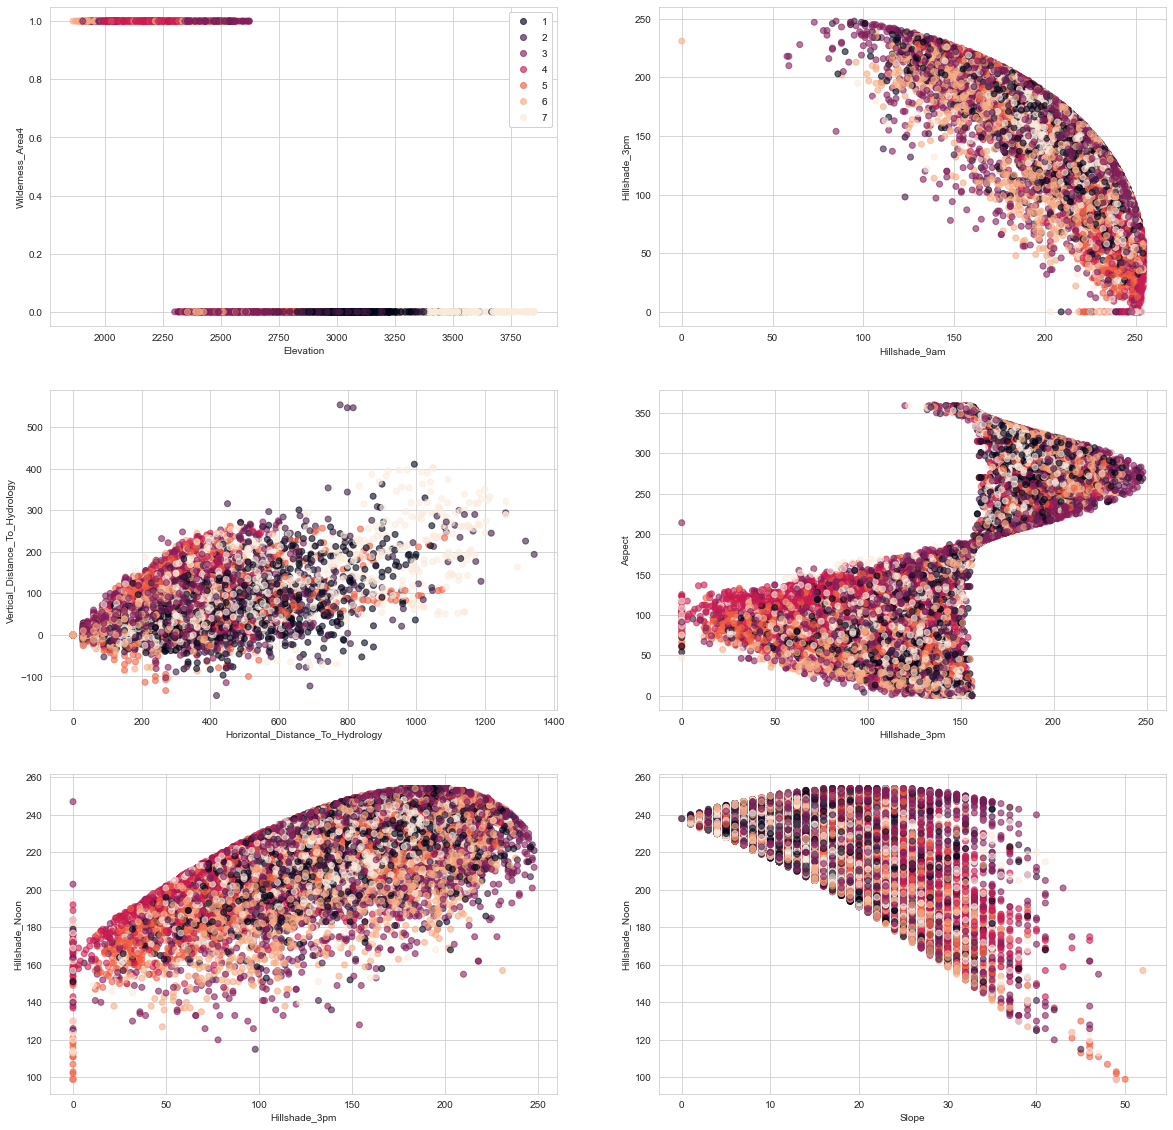

In [11]:
figure, axis = plt.subplots(3,2,figsize=(20,20))

sc1 = axis[0, 0].scatter(data.Elevation, data.Wilderness_Area4, c = data.Cover_Type, alpha = 0.6)
axis[0, 0].set(xlabel='Elevation', ylabel='Wilderness_Area4')
legend1 = axis[0, 0].legend(*sc1.legend_elements())
axis[0, 0].add_artist(legend1)

axis[0, 1].scatter(data.Hillshade_9am, data.Hillshade_3pm,c = data.Cover_Type, alpha = 0.6)
axis[0, 1].set(xlabel='Hillshade_9am', ylabel='Hillshade_3pm')

axis[2, 1].scatter(data.Slope, data.Hillshade_Noon,c = data.Cover_Type, alpha = 0.6)
axis[2, 1].set(xlabel='Slope', ylabel='Hillshade_Noon')

axis[2, 0].scatter(data.Hillshade_3pm, data.Hillshade_Noon,c = data.Cover_Type, alpha = 0.6)
axis[2, 0].set(xlabel='Hillshade_3pm', ylabel='Hillshade_Noon')

axis[1, 1].scatter(data.Hillshade_3pm, data.Aspect,c = data.Cover_Type, alpha = 0.6)
axis[1, 1].set(xlabel='Hillshade_3pm', ylabel='Aspect')

axis[1, 0].scatter(data.Horizontal_Distance_To_Hydrology, data.Vertical_Distance_To_Hydrology,c = data.Cover_Type, alpha = 0.6)
axis[1, 0].set(xlabel = "Horizontal_Distance_To_Hydrology", ylabel = "Vertical_Distance_To_Hydrology")

plt.show()

They seem to have some relationships. How can I add them to features?


#### Distrubution of cover type for independent variables 

In [12]:
# Train-test split

data_train, data_test = train_test_split(data.copy(deep=True), 
                                         test_size=0.1, 
                                         random_state=314,
                                         stratify=data['Cover_Type'])

We want to see if the cover types are evenly distributed. It turns out they are perfectly distributed!

In [13]:
classes = [0,0,0,0,0,0,0]

for x in data_train['Cover_Type']:
    classes[x-1] = classes[x-1] + 1

print(classes)

[1944, 1944, 1944, 1944, 1944, 1944, 1944]


In [14]:
# Definining the continuous variables (soil types and wilderness areas are the categorical variables)

contvars = data.columns[1:11]

Making histograms for each continuous variable:

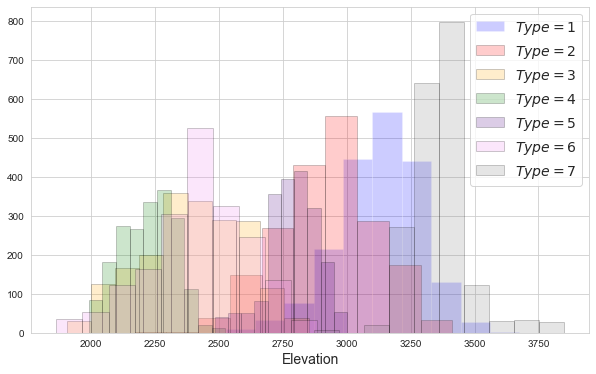

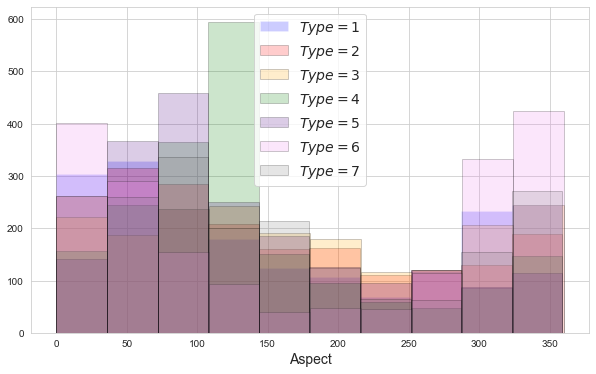

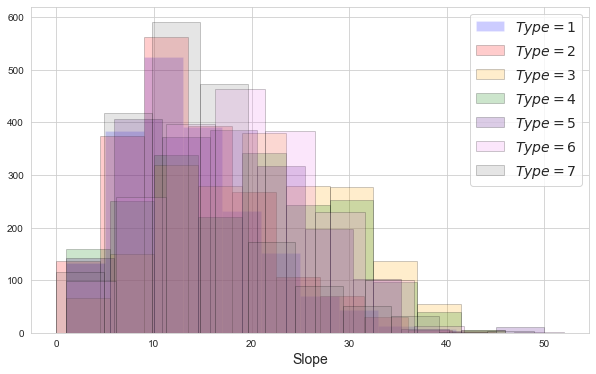

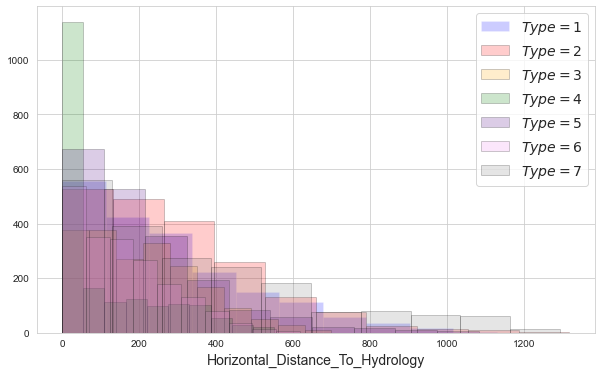

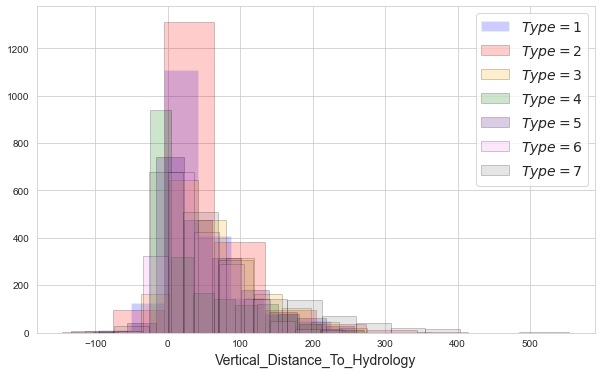

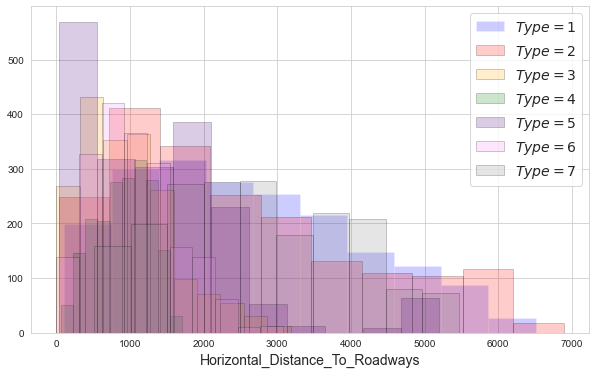

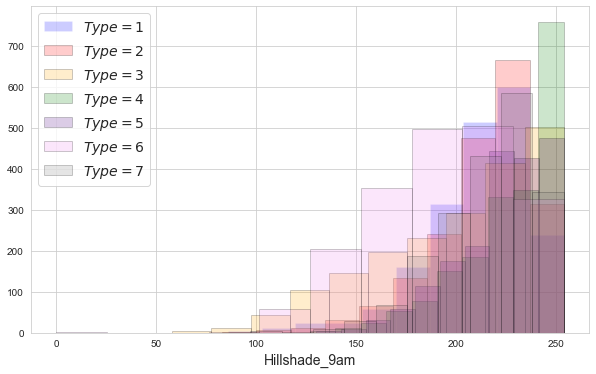

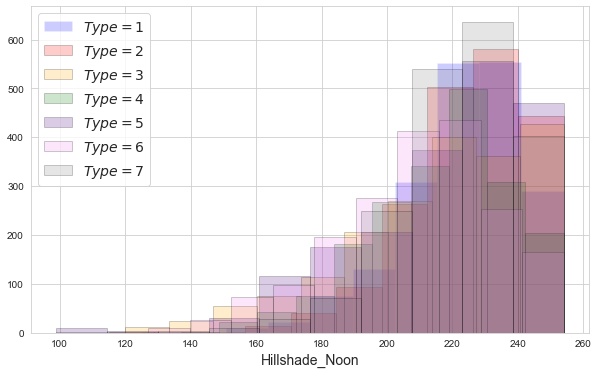

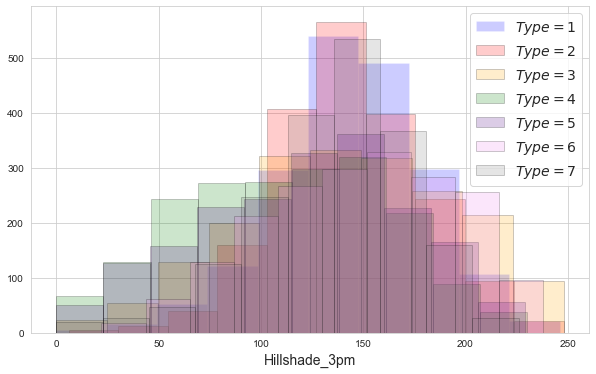

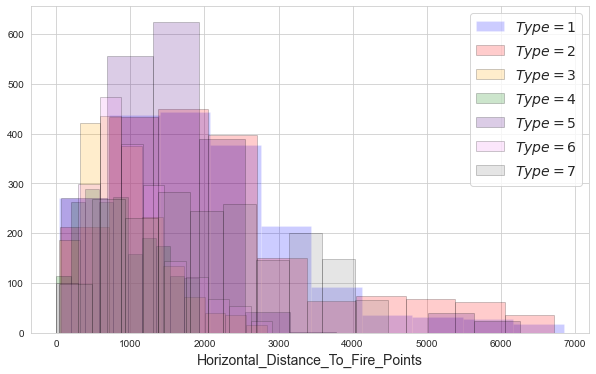

In [15]:
for trait in contvars:
    plt.figure(figsize=(10,6))


    plt.hist(data_train.loc[data_train.Cover_Type==1][trait].values,
                color='blue',
                alpha=.2,
                label="$Type=1$")

    plt.hist(data_train.loc[data_train.Cover_Type==2][trait].values,
                color='red',
                alpha=.2,
                edgecolor='black',
                label="$Type=2$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==3][trait].values,
                color='orange',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=3$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==4][trait].values,
                color='green',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=4$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==5][trait].values,
                color='indigo',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=5$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==6][trait].values,
                color='violet',
                alpha=.2,
                
                edgecolor='black',
                label="$Type=6$")
    
    plt.hist(data_train.loc[data_train.Cover_Type==7][trait].values,
                color='grey',
                alpha=.2,  
                edgecolor='black',
                label="$Type=7$")

    plt.xlabel(trait, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

Notable traits: Elevation. Aspect. Sort of Slope. Horizontal Distance to Fire Points
#### Distribution of cover types for Soil Types 1-40 and for Wilderness Areas 1-40:

In [16]:
# Does the distribution of Cover_Type change for Soil_Type 1-40?
# The output: Each row is a different Soil Type. Each entry of the list is the count of Cover_Type in that soil.

i=1
while i<= 40:
    classes = [0,0,0,0,0,0,0]
    soil = 'Soil_Type' + str(i)
    for x in data_train.loc[data_train[soil]==1].iloc:
        classes[x['Cover_Type']-1] = classes[x['Cover_Type']-1] + 1
    i+=1
    print(classes)

[0, 0, 107, 128, 0, 85, 0]
[0, 2, 254, 81, 55, 169, 0]
[0, 12, 125, 720, 0, 13, 0]
[5, 18, 411, 120, 118, 74, 7]
[0, 0, 52, 37, 0, 66, 0]
[0, 6, 224, 213, 0, 133, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0]
[1, 9, 0, 0, 0, 0, 0]
[9, 75, 644, 151, 56, 995, 0]
[3, 61, 80, 23, 131, 59, 0]
[20, 180, 0, 0, 0, 0, 0]
[16, 77, 4, 0, 274, 60, 0]
[0, 0, 4, 117, 0, 35, 0]
[0, 0, 0, 0, 0, 0, 0]
[8, 13, 5, 36, 9, 34, 0]
[2, 5, 29, 318, 120, 80, 0]
[0, 16, 0, 0, 40, 0, 0]
[12, 11, 0, 0, 17, 0, 0]
[38, 48, 0, 0, 5, 35, 0]
[9, 0, 0, 0, 0, 0, 3]
[253, 48, 0, 0, 0, 0, 16]
[350, 138, 0, 0, 139, 1, 65]
[111, 64, 0, 0, 9, 15, 28]
[0, 0, 0, 0, 0, 0, 0]
[7, 17, 0, 0, 22, 0, 0]
[7, 5, 0, 0, 0, 0, 3]
[0, 5, 0, 0, 3, 0, 0]
[355, 491, 0, 0, 227, 0, 62]
[66, 131, 0, 0, 442, 0, 16]
[103, 89, 0, 0, 78, 7, 23]
[207, 232, 5, 0, 92, 27, 66]
[167, 167, 0, 0, 103, 54, 56]
[0, 10, 0, 0, 4, 2, 4]
[3, 1, 0, 0, 0, 0, 87]
[0, 2, 0, 0, 0, 0, 7]
[0, 0, 0, 0, 0, 0, 27]
[76, 5, 0, 0, 0, 0, 581]
[73, 2, 0, 0, 0, 0, 526]
[43, 3

In [17]:
# Does the distribution of Cover_Type change for Wilderness_Area 1-4?
# The output: Each row is a different Wilderness Area. Each entry of the list is the count of Cover_Type in that area.

i=1
while i<= 4:
    classes = [0,0,0,0,0,0,0]
    wild = 'Wilderness_Area' + str(i)
    for x in data_train.loc[data_train[wild]==1].iloc:
        classes[x['Cover_Type']-1] = classes[x['Cover_Type']-1] + 1
    i+=1
    print(classes)

[948, 1017, 0, 0, 778, 0, 488]
[163, 56, 0, 0, 0, 0, 230]
[833, 852, 771, 0, 1166, 859, 1226]
[0, 19, 1173, 1944, 0, 1085, 0]


Some basic observations can be seen: Every cover type 4 is in Wilderness Area 4. No trees at all in Soil Type 7.

## Model comparisons
We have deployed a base model as multi logistic regression and 6 different ML models as belows. 
- Ensemble Learning
    - Random forest
    - XGboost
    - Gradient boosting
    - Adaboost
- KNN (K-nearest neighbors)
- SVM (support vector machines) 


### Train-test splits
Spliting the original dataset into 9:1.

In [19]:
data1 = data.copy(deep=True).drop(["Soil_Type7", "Soil_Type15"],axis=1)


In [20]:
train, test = train_test_split(data1.copy(deep=True),
                               shuffle = True,
                               random_state=314,
                               test_size=0.1,
                               stratify=data['Cover_Type'])

In [21]:
X_train = train.drop(['Cover_Type'],axis=1)
y_train = train['Cover_Type']
X_test = test.drop(['Cover_Type'],axis=1)
y_test = test['Cover_Type']

### Base model: Multi logistic regression with only soil data

In [23]:
soil_X_train = X_train.iloc[:,15:55]
soil_X_test = X_test.iloc[:,15:55]

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
LR.fit(soil_X_train, y_train)

C:\Users\m0eka\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [25]:
lr_base_pred = LR.predict(soil_X_test)

In [26]:
def print_result(model, y_prediction):
    confusion = confusion_matrix(y_test,y_prediction)
    cm = pd.DataFrame(confusion, 
                         index = [i for i in "1234567"],
                         columns = [i for i in "1234567"])
    plt.figure(figsize=(8,5))
    sns.set(font_scale=1)
    sns.heatmap(cm,annot=True,fmt='g', cmap='Blues',
               annot_kws={"size": 10})
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(model)
    plt.show()
        
    print(model)
    print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test, y_prediction)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_prediction, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_prediction, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_prediction, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_prediction, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_prediction, average='weighted')))


    print('\nClassification Report\n')
    print(classification_report(y_test, y_prediction, 
                                target_names=['1','2','3','4','5','6','7']))

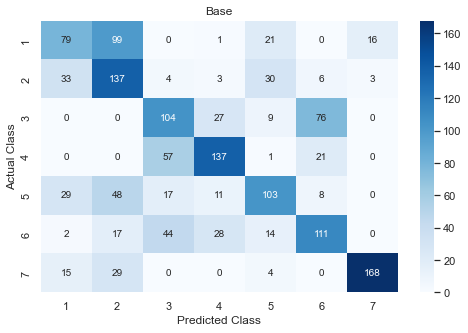

Base

Accuracy: 0.555

Micro Precision: 0.55
Micro Recall: 0.55
Micro F1-score: 0.55

Macro Precision: 0.57
Macro Recall: 0.55
Macro F1-score: 0.56

Weighted Precision: 0.57
Weighted Recall: 0.55
Weighted F1-score: 0.56

Classification Report

              precision    recall  f1-score   support

           1       0.50      0.37      0.42       216
           2       0.42      0.63      0.50       216
           3       0.46      0.48      0.47       216
           4       0.66      0.63      0.65       216
           5       0.57      0.48      0.52       216
           6       0.50      0.51      0.51       216
           7       0.90      0.78      0.83       216

    accuracy                           0.55      1512
   macro avg       0.57      0.55      0.56      1512
weighted avg       0.57      0.55      0.56      1512



In [27]:
print_result("Base",lr_base_pred)

### Default Random Forest

In [29]:
rf = RandomForestClassifier(random_state = 314)
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

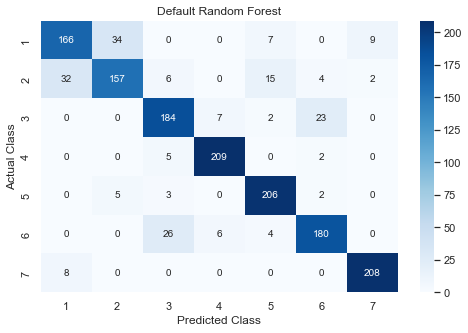

Default Random Forest

Accuracy: 0.866

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.86
Macro Recall: 0.87
Macro F1-score: 0.86

Weighted Precision: 0.86
Weighted Recall: 0.87
Weighted F1-score: 0.86

Classification Report

              precision    recall  f1-score   support

           1       0.81      0.77      0.79       216
           2       0.80      0.73      0.76       216
           3       0.82      0.85      0.84       216
           4       0.94      0.97      0.95       216
           5       0.88      0.95      0.92       216
           6       0.85      0.83      0.84       216
           7       0.95      0.96      0.96       216

    accuracy                           0.87      1512
   macro avg       0.86      0.87      0.86      1512
weighted avg       0.86      0.87      0.86      1512



In [30]:
print_result("Default Random Forest",y_rf_pred)

#### Does feature enginnering improve our models?

In [32]:
data_add = data1.copy(deep=True) # training set with addtional features

data_add['Hillshade_9am_3pm'] = data_add['Hillshade_9am'] + data_add['Hillshade_3pm']
data_add['Hillshade_noon_Slope'] = data_add['Hillshade_Noon'] + data_add['Slope']
data_add['Hillshade_noon_3pm'] = data_add['Hillshade_3pm'] + data_add['Hillshade_Noon']
data_add['Hillshade_3pm_aspect'] = data_add['Aspect'] + data_add['Hillshade_3pm']
data_add['Hydorology'] = data_add['Horizontal_Distance_To_Hydrology'] + data_add['Vertical_Distance_To_Hydrology']

In [33]:
train_add, test_add = train_test_split(data_add.copy(deep=True),
                               shuffle = True,
                               random_state=314,
                               test_size=0.1,
                               stratify=data['Cover_Type'])

In [35]:
X_train_add = train_add.drop(['Cover_Type'],axis=1)
X_test_add = test_add.drop(['Cover_Type'],axis=1)

Default random forest with additional features

In [37]:
rf_add = RandomForestClassifier(random_state = 314)
rf_add.fit(X_train_add,y_train)
y_rf_add_pred = rf_add.predict(X_test_add)

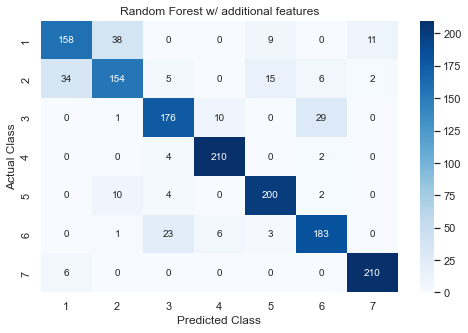

Random Forest w/ additional features

Accuracy: 0.854

Micro Precision: 0.85
Micro Recall: 0.85
Micro F1-score: 0.85

Macro Precision: 0.85
Macro Recall: 0.85
Macro F1-score: 0.85

Weighted Precision: 0.85
Weighted Recall: 0.85
Weighted F1-score: 0.85

Classification Report

              precision    recall  f1-score   support

           1       0.80      0.73      0.76       216
           2       0.75      0.71      0.73       216
           3       0.83      0.81      0.82       216
           4       0.93      0.97      0.95       216
           5       0.88      0.93      0.90       216
           6       0.82      0.85      0.84       216
           7       0.94      0.97      0.96       216

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512



In [38]:
print_result("Random Forest w/ additional features",y_rf_add_pred)

Feature engineering does not seem very successful in improving our models. Will not consider in the later analysis.

#### Does PCA improve our models?

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Definining the continuous variables (soil types and wilderness areas are the categorical variables)

contvars = data.columns[1:11]

# Definining the categorical variables (soil types and wilderness areas are the categorical variables)
catvars = data.columns[11:-1]

X = data.copy(deep=True).drop(['Cover_Type'],axis=1)
y = data.copy(deep=True)['Cover_Type']

In [53]:
# Pipeline: scale -> pca(q)

for q in range (2,5): #iterating on pca dims
    pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(q))])

    fit = pipe.fit_transform(X[contvars]) #just doing pca on the contvars

    X_fit = pd.DataFrame(fit)
    dataaa = X[catvars]
    j=0
    while j<= q-1:
        dataaa[j] = X_fit[j]
        j+=1
    
    #test split
    X_train_pca,X_test_pca, y_train_pca, y_test_pca = train_test_split(dataaa,y,
                               shuffle = True,
                               random_state=314,
                               test_size=0.1)
    
    rf_accuracy = {}
    for i in range(1,5):
        rf = RandomForestClassifier(n_estimators = 100*i)
        rf.fit(X_train_pca,y_train_pca)
        y_pred = rf.predict(X_test_pca)
        rf_accuracy[100*i] = round(accuracy_score(y_test_pca, y_pred),4)
    print('For PCA', q, ':', rf_accuracy)

For PCA 2 : {100: 0.662, 200: 0.6601, 300: 0.6581, 400: 0.6627}
For PCA 3 : {100: 0.7149, 200: 0.7136, 300: 0.713, 400: 0.7163}
For PCA 4 : {100: 0.7421, 200: 0.7467, 300: 0.7434, 400: 0.752}


PCA does not seem very successful in improving our models! Our accuracy increases as we include more dimensions, might as well consider all of the variables.

#### Rondom Forest with parameter tuning
Use the GridserachCV to hypertune parameters in n_estimators and max_depth.

In [58]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state = 314)
rf_pram = {"n_estimators": [200, 800, 200],
            "max_depth": [10,20,30,40]}

rf_grid = GridSearchCV(estimator = rf, 
                               param_grid = rf_pram,
                               n_jobs = -1,
                               cv = 5, 
                               verbose=3)                             
# Fit the grid search model
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [200, 800, 200]},
             verbose=3)

In [59]:
print(rf_grid.best_params_)
print("Accuracy is "+ str(round(rf_grid.best_score_,3)))

{'max_depth': 40, 'n_estimators': 800}
Accuracy is 0.871


In [60]:
rf = RandomForestClassifier(n_estimators = 800, max_depth=40, random_state = 314)
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

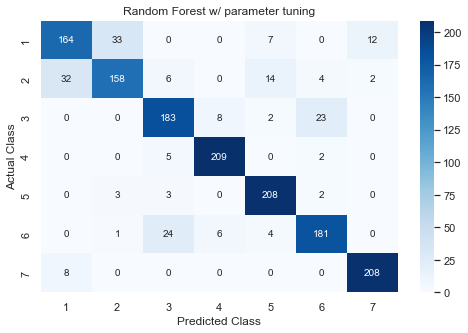

Random Forest w/ parameter tuning

Accuracy: 0.867

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

           1       0.80      0.76      0.78       216
           2       0.81      0.73      0.77       216
           3       0.83      0.85      0.84       216
           4       0.94      0.97      0.95       216
           5       0.89      0.96      0.92       216
           6       0.85      0.84      0.85       216
           7       0.94      0.96      0.95       216

    accuracy                           0.87      1512
   macro avg       0.87      0.87      0.87      1512
weighted avg       0.87      0.87      0.87      1512



In [61]:
print_result("Random Forest w/ parameter tuning",y_rf_pred)

The result did not change much between with and without parameter tuning.

### XGBoost

In [62]:
import xgboost
from xgboost import XGBClassifier

It will take a long while to run

In [63]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=314
)
xgb_param = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(100, 600, 100),
    'learning_rate': [1]
}

xgb_grid = GridSearchCV(estimator = xgb, 
                               param_grid = xgb_param,
                               n_jobs = -1,
                               cv = 5, 
                               verbose=3)                             

# Fit the grid search model
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[23:05:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale

In [64]:
print(xgb_grid.best_params_)
print("Accuracy is "+ str(round(xgb_grid.best_score_,3)))

{'learning_rate': 1, 'max_depth': 8, 'n_estimators': 500}
Accuracy is 0.877


In [66]:
xgb = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=314,
    learning_rate = 1,
    max_depth = 8,
    n_estimators = 500
)
xgb.fit(X_train,y_train)
y_xgb_pred = xgb.predict(X_test)

[23:16:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


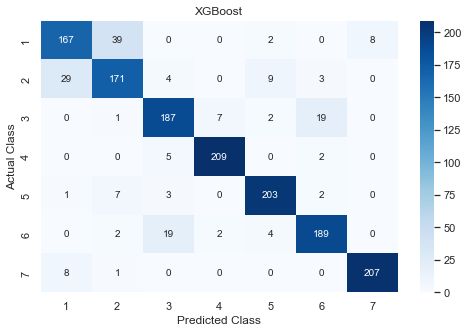

XGBoost

Accuracy: 0.882

Micro Precision: 0.88
Micro Recall: 0.88
Micro F1-score: 0.88

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

           1       0.81      0.77      0.79       216
           2       0.77      0.79      0.78       216
           3       0.86      0.87      0.86       216
           4       0.96      0.97      0.96       216
           5       0.92      0.94      0.93       216
           6       0.88      0.88      0.88       216
           7       0.96      0.96      0.96       216

    accuracy                           0.88      1512
   macro avg       0.88      0.88      0.88      1512
weighted avg       0.88      0.88      0.88      1512



In [67]:
print_result("XGBoost",y_xgb_pred)

### Gradient boosting

In [68]:
## import GradientBoosting here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

In [69]:
# Warning: this takes a long time to run.

gb_accuracy = {}
for i in range(8,12):
    gb = GradientBoostingClassifier(n_estimators = 100*i)
    gb.fit(X_train,y_train)
    y_pred = gb.predict(X_test)
    gb_accuracy[100*i] = round(accuracy_score(y_test, y_pred),4)
    print('Checked i=', i)
print(gb_accuracy)

Checked i= 8
Checked i= 9
Checked i= 10
Checked i= 11
{800: 0.8684, 900: 0.8671, 1000: 0.8677, 1100: 0.8677}


In [71]:
gb = GradientBoostingClassifier(n_estimators = 1000)
gb.fit(X_train,y_train)
y_gb_pred = gb.predict(X_test)

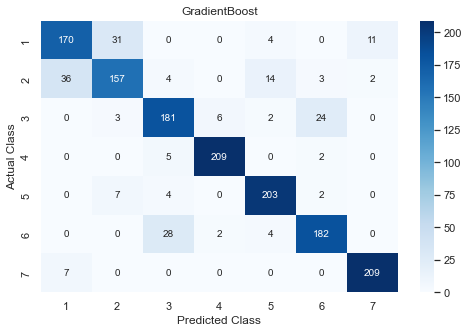

GradientBoost

Accuracy: 0.867

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

           1       0.80      0.79      0.79       216
           2       0.79      0.73      0.76       216
           3       0.82      0.84      0.83       216
           4       0.96      0.97      0.97       216
           5       0.89      0.94      0.92       216
           6       0.85      0.84      0.85       216
           7       0.94      0.97      0.95       216

    accuracy                           0.87      1512
   macro avg       0.87      0.87      0.87      1512
weighted avg       0.87      0.87      0.87      1512



In [72]:
print_result("GradientBoost",y_gb_pred)

### Adaboost
This algorithm was not very successful.

In [73]:
## import adaboosting here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

ab_param = {
    'n_estimators': range(1,26)
}
                          

ab_grid = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                             learning_rate=1),
                          param_grid = ab_param, 
                          scoring = 'accuracy', 
                          n_jobs = -1,
                          cv = 5, 
                          verbose=3)
# Fit the grid search model
ab_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                          learning_rate=1),
             n_jobs=-1, param_grid={'n_estimators': range(1, 26)},
             scoring='accuracy', verbose=3)

In [76]:
print(ab_grid.best_params_)
print("Accuracy is "+ str(round(ab_grid.best_score_,3)))

{'n_estimators': 8}
Accuracy is 0.501


In [77]:
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                             learning_rate=1,
                                              n_estimators = 8)
ab.fit(X_train,y_train)
y_ab_pred = ab.predict(X_test)

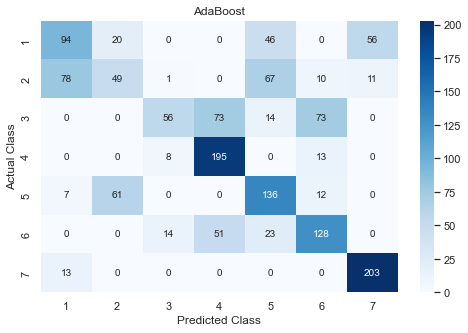

AdaBoost

Accuracy: 0.569

Micro Precision: 0.57
Micro Recall: 0.57
Micro F1-score: 0.57

Macro Precision: 0.57
Macro Recall: 0.57
Macro F1-score: 0.54

Weighted Precision: 0.57
Weighted Recall: 0.57
Weighted F1-score: 0.54

Classification Report

              precision    recall  f1-score   support

           1       0.49      0.44      0.46       216
           2       0.38      0.23      0.28       216
           3       0.71      0.26      0.38       216
           4       0.61      0.90      0.73       216
           5       0.48      0.63      0.54       216
           6       0.54      0.59      0.57       216
           7       0.75      0.94      0.84       216

    accuracy                           0.57      1512
   macro avg       0.57      0.57      0.54      1512
weighted avg       0.57      0.57      0.54      1512



In [78]:
print_result("AdaBoost",y_ab_pred)

### KNN model
Unlike Random forest, KNN requires scaling of numerical values. MinMaxScaler was applied before KNN in the pipe

In [79]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [80]:
norm_knn = Pipeline(steps = [("minmax",MinMaxScaler()),
                              ("knn",KNeighborsClassifier())])

Hyperparameter tuning.

In [81]:
n_neighbors = list(range(1,30))
#Convert to dictionary
hyperparameters = {"knn__n_neighbors":n_neighbors}

#Use GridSearch
knn_grid = GridSearchCV(norm_knn, 
                   hyperparameters, 
                   cv=10,
                   scoring='accuracy',
                   return_train_score=False,
                   verbose=1)
#Fit the model
knn_best = knn_grid.fit(X_train,y_train)


Fitting 10 folds for each of 29 candidates, totalling 290 fits


In [82]:
print(knn_best.best_params_)
print("Accuracy is "+ str(round(knn_best.best_score_,3)))

{'knn__n_neighbors': 1}
Accuracy is 0.802


In [83]:
norm_knn = Pipeline(steps = [("minmax",MinMaxScaler()),
                              ("knn",KNeighborsClassifier(n_neighbors = 1))])

norm_knn.fit(X_train,y_train)
y_pred_knn = norm_knn.predict(X_test)

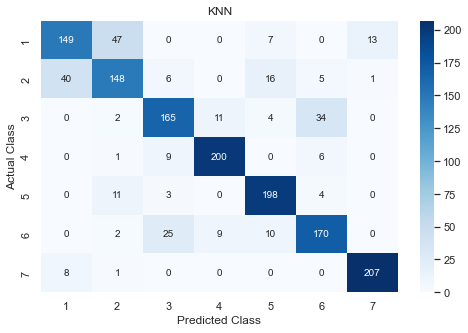

KNN

Accuracy: 0.818

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.82
Macro Recall: 0.82
Macro F1-score: 0.82

Weighted Precision: 0.82
Weighted Recall: 0.82
Weighted F1-score: 0.82

Classification Report

              precision    recall  f1-score   support

           1       0.76      0.69      0.72       216
           2       0.70      0.69      0.69       216
           3       0.79      0.76      0.78       216
           4       0.91      0.93      0.92       216
           5       0.84      0.92      0.88       216
           6       0.78      0.79      0.78       216
           7       0.94      0.96      0.95       216

    accuracy                           0.82      1512
   macro avg       0.82      0.82      0.82      1512
weighted avg       0.82      0.82      0.82      1512



In [84]:
print_result("KNN",y_pred_knn)

### SVM
Compare 3 types of SVM (rbf, polynominal, sigmoid) with Grid serach

In [85]:
from sklearn.svm import SVC

norm_svc = Pipeline(steps = [("minmax",MinMaxScaler()),
                              ("svc",SVC(random_state = 314))])

param_svc = {'svc__C': [0.1, 1, 10, 100, 1000], 
             'svc__gamma': [1,0.1,0.01,0.001],
             'svc__kernel': ['rbf', 'poly', 'sigmoid']}

svc_grid = GridSearchCV(norm_svc, 
                   param_svc, 
                   cv=5,
                   scoring='accuracy',
                   return_train_score=False,
                   verbose=1)


This will take a while

In [86]:
#Fit the model
svc_best = svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [87]:
print(svc_best.best_params_)
print("Accuracy is "+ str(round(svc_best.best_score_,3)))

{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel': 'rbf'}
Accuracy is 0.819


In [88]:
norm_svc = Pipeline(steps = [("minmax",MinMaxScaler()),
                              ("svc",SVC(random_state = 314,
                                        C= 100,
                                        gamma= 1,
                                        kernel = 'rbf'))])

norm_svc.fit(X_train,y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('svc', SVC(C=100, gamma=1, random_state=314))])

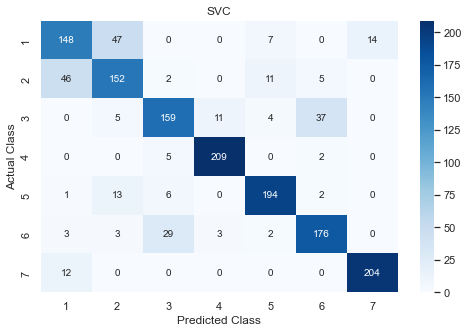

SVC

Accuracy: 0.821

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.82
Macro Recall: 0.82
Macro F1-score: 0.82

Weighted Precision: 0.82
Weighted Recall: 0.82
Weighted F1-score: 0.82

Classification Report

              precision    recall  f1-score   support

           1       0.70      0.69      0.69       216
           2       0.69      0.70      0.70       216
           3       0.79      0.74      0.76       216
           4       0.94      0.97      0.95       216
           5       0.89      0.90      0.89       216
           6       0.79      0.81      0.80       216
           7       0.94      0.94      0.94       216

    accuracy                           0.82      1512
   macro avg       0.82      0.82      0.82      1512
weighted avg       0.82      0.82      0.82      1512



In [89]:
y_pred_svc = norm_svc.predict(X_test)
print_result("SVC",y_pred_svc)